In [2]:
# importo la funzione start_kaggle che ho definito nel file autenticazione.py
from autenticazione.autenticazione import start_kaggle

# chiamo la funzione start_kaggle
start_kaggle()

# imposto il path in cui scaricare il dataset
# path = os.path.dirname(os.path.abspath(__file__)) + '/dataset' su juptyer notebook non funziona
# usare invece sys.path[0] + '/dataset' con la libreria sys
import sys
path = sys.path[0] + '/dataset'

# importo le librerie necessarie di default
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignorare i warning
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Visualizzare la lista dei dataset
key_search = str(input("Inserisci la chiave di ricerca: "))
datasets = kaggle.api.datasets_list(search=key_search)

# stampo la lista dei dataset
# la lista di dataset è una lista di dizionari, il cui valore di owner e' contenuto nella key 'ref'

print("Lista dei dataset trovati: ")
for i in range(len(datasets)):
    print(f"{i}: {datasets[i]['ref']}")


Lista dei dataset trovati: 
0: sudalairajkumar/covid19-in-italy
1: blackecho/italy-earthquakes
2: paultimothymooney/coronavirus-in-italy
3: mpwolke/cusersmarildownloadspopolazionecsv
4: bsridatta/covid-19-italy-updated-regularly
5: virosky/italy-covid19
6: alessiocrisafulli/airbnb-italy
7: tommasoramella/italy-house-prices
8: arielcedola/solar-generation-and-demand-italy-20152016
9: lorenzopagliaro01/coronavirus-italian-data
10: die9origephit/covid19-italy-tuscany-data
11: marcoferrante/covid19-prevention-in-italy
12: sudalairajkumar/novel-corona-virus-2019-dataset
13: sandhyakrishnan02/italy-population-19552020
14: samuelcortinhas/gdp-of-european-countries
15: rafabelokurows/weekly-fuel-prices-in-italy
16: atilamadai/covid19
17: miklgr500/jigsaw-train-multilingual-coments-google-api
18: paolocons/small-dataset-about-used-fiat-500-sold-in-italy
19: harrywang/wine-dataset-for-clustering


In [4]:
# scelgo il dataset che mi interessa e lo scarico
dt_scelto = int(input("Inserisci il numero del dataset che ti interessa: "))

# salvo in una variabile i nomi di tutti i file del dataset
file_name = kaggle.api.dataset_list_files(datasets[dt_scelto]['ref']).files

# scarico il dataset
kaggle.api.dataset_download_files(datasets[dt_scelto]['ref'], path=path, unzip=True)

In [5]:
for i in range(len(file_name)):
    print(f"File n {i}: {file_name[i]}")


File n 0: limits_IT_provinces.geojson
File n 1: italy_housing_price_rent_clean.csv
File n 2: italy_housing_price_rent_raw.csv
File n 3: limits_IT_regions.geojson
File n 4: limits_IT_municipalities.geojson


In [6]:
def choise_df(file_name):
    choise = int(input('Scegli il file da aprire: '))
    if '.csv' in str(file_name[choise]):
        df = pd.read_csv(path + '/' + str(file_name[choise]))
    elif '.json' in str(file_name[choise]):
        df = pd.read_json(path + '/' + str(file_name[choise]))
    else:
        print('Formato non riconosciuto')
    return df

In [10]:
# importazione delle nuove librerie necessarie
from deep_translator import GoogleTranslator
import json
import plotly.express as px
import geopandas as gpd
from pandas_geojson import read_geojson

In [13]:
## translate columns in english
def Translate(italian_input):
    return GoogleTranslator(source='it', target='en').translate(italian_input)

In [11]:
df = choise_df(file_name)

In [ ]:
df.head() 

In [14]:
# traduciamo le colonne in inglese
columns_translated = [Translate(c) for c in df.columns]
columns_translated[12], columns_translated[-1] = "sea_view", "mansard"
columns_translated = [c.replace(" ", "_") for c in columns_translated]
df.columns = columns_translated

In [21]:
df.head() 

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,rooms,top_floor,...,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts,mansard
0,NaN,Milano,Centrale,1800.0,2023-07-03,1,0.333333,1.0,3.0,0,...,0,0,0,0,0,0,1,0,0,0
1,NaN,Torino,Santa Rita,450.0,2023-07-03,0,0.500000,1.0,2.0,1,...,0,0,0,0,0,0,1,0,0,0
2,NaN,Padova,Prato della Valle - Pontecorvo,3200.0,2023-07-03,1,NaN,3.0,NaN,0,...,0,0,0,0,0,0,1,0,0,0
3,NaN,Firenze,Galluzzo,1700.0,2022-12-21,0,NaN,3.0,NaN,1,...,1,0,0,0,1,0,0,0,0,0
4,NaN,Monte Argentario,Località Poggio Pertuso,4000.0,2023-06-03,1,0.600000,3.0,5.0,0,...,1,0,0,0,1,0,0,0,0,0


12500000.0


(array([ 255.,  160., 1445., 5307., 8532., 7531., 6341., 5075., 3555.,
        3522., 1737., 2503., 1819., 1290., 1936.,  896.,  700., 1027.,
         457., 1148.,  296.,  513.,  355.,  260.,   46.,  832.,  184.,
         206.,  243.,  137.,  612.,   82.,  167.,  117.,   49.,  375.,
          75.,  100.,   90.,   69.,  301.,   30.,   46.,   30.,   30.,
         194.,   16.,   13.,   37.,   27.]),
 array([1.00000e+00, 1.00960e+02, 2.00920e+02, 3.00880e+02, 4.00840e+02,
        5.00800e+02, 6.00760e+02, 7.00720e+02, 8.00680e+02, 9.00640e+02,
        1.00060e+03, 1.10056e+03, 1.20052e+03, 1.30048e+03, 1.40044e+03,
        1.50040e+03, 1.60036e+03, 1.70032e+03, 1.80028e+03, 1.90024e+03,
        2.00020e+03, 2.10016e+03, 2.20012e+03, 2.30008e+03, 2.40004e+03,
        2.50000e+03, 2.59996e+03, 2.69992e+03, 2.79988e+03, 2.89984e+03,
        2.99980e+03, 3.09976e+03, 3.19972e+03, 3.29968e+03, 3.39964e+03,
        3.49960e+03, 3.59956e+03, 3.69952e+03, 3.79948e+03, 3.89944e+03,
        3.99940e

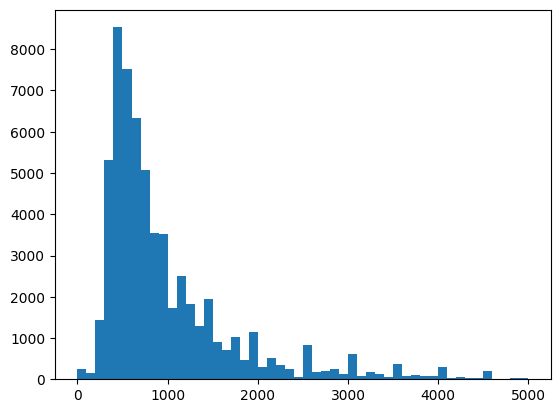

In [22]:
print(df['price'].max())
df = df.loc[df['price'] < 5000]
plt.hist(df['price'], bins=50)



In [23]:
# clean datetime
import datetime
from datetime import date
TODAY = np.datetime64(date.today())
FULL_CALENDAR = pd.DataFrame(pd.date_range(start="2023-01-01", end=TODAY), columns=['datetime'])

df['datetime'] = pd.to_datetime(df['datetime'])
df = df.loc[(df['datetime']>"01-01-2023") & (df['datetime']<TODAY)]
df['month'] = df['datetime'].dt.to_period('M').dt.start_time
df['week'] = df['datetime'].dt.to_period('W').dt.start_time

In [24]:
df.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,rooms,top_floor,...,doorman,pool,villa,entire_property,apartment,attic,lofts,mansard,month,week
0,NaN,Milano,Centrale,1800.0,2023-07-03,1,0.333333,1.0,3.0,0,...,0,0,0,0,1,0,0,0,2023-07-01,2023-07-03
1,NaN,Torino,Santa Rita,450.0,2023-07-03,0,0.500000,1.0,2.0,1,...,0,0,0,0,1,0,0,0,2023-07-01,2023-07-03
2,NaN,Padova,Prato della Valle - Pontecorvo,3200.0,2023-07-03,1,NaN,3.0,NaN,0,...,0,0,0,0,1,0,0,0,2023-07-01,2023-07-03
4,NaN,Monte Argentario,Località Poggio Pertuso,4000.0,2023-06-03,1,0.600000,3.0,5.0,0,...,0,0,1,0,0,0,0,0,2023-06-01,2023-05-29
6,NaN,Firenze,Michelangelo - Poggio Imperiale,900.0,2023-07-03,0,0.333333,1.0,3.0,1,...,0,0,0,0,1,0,0,0,2023-07-01,2023-07-03


In [31]:
df.region.value_counts().sort_values(ascending=False)

lazio                  8190
lombardia              8064
piemonte               6615
emilia-romagna         5214
veneto                 3851
campania               3443
liguria                2996
sicilia                2933
toscana                2297
puglia                 1373
marche                 1211
umbria                 1193
abruzzo                 868
trentino-alto-adige     635
sardegna                454
calabria                267
basilicata              148
valle-d-aosta           142
molise                  141
Name: region, dtype: int64

In [30]:
# sostituire al valore 'Liguria' nella colonna region con 'liguria'
df['region'] = df['region'].replace('Liguria', 'liguria')

Text(0.5, 1.0, 'Squared meters')

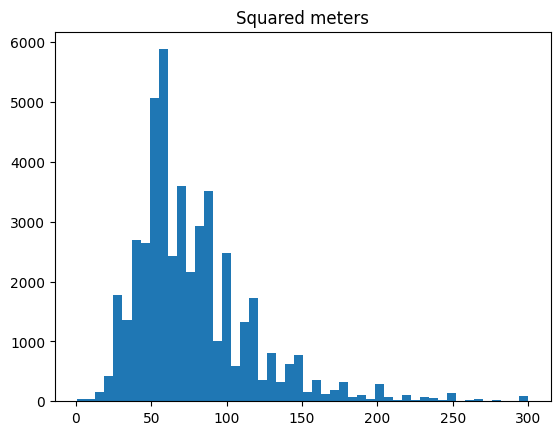

In [32]:
# sq. meters
plt.hist(df['surface'], bins=50)
plt.title("Squared meters")

In [27]:
# furnished
df['furnished'].value_counts()

1    34503
0    15542
Name: furnished, dtype: int64

Text(0.5, 1.0, 'Flat type')

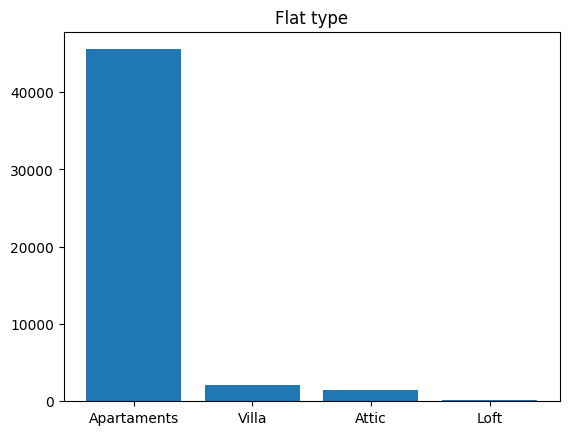

In [28]:
# type of building 
types = {
    "Apartaments": len(df.loc[df['apartment']==1]), 
    "Villa": len(df.loc[df['villa']==1]),
    "Attic": len(df.loc[df['attic']==1]) + len(df.loc[df['mansard']==1]),
    "Loft": len(df.loc[df['lofts']==1]),
}

plt.bar(types.keys(), types.values())
plt.title("Flat type")

Text(0, 0.5, 'Region')

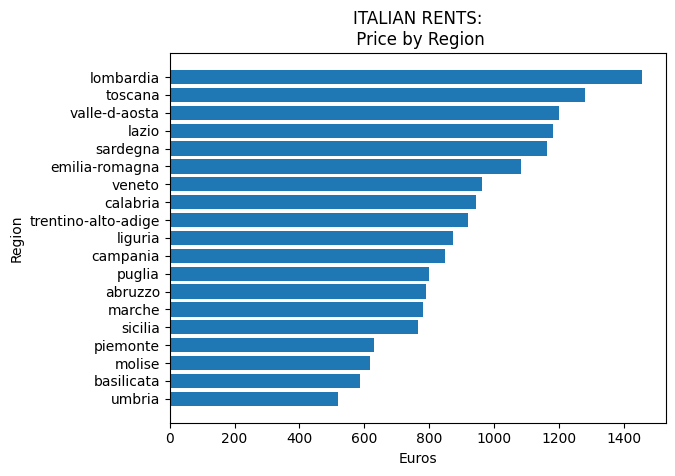

In [33]:
## price by region  
price_by_regione = df['price'].groupby(df["region"]).mean().sort_values(ascending=True)
fig1, ax = plt.subplots()
ax.barh(price_by_regione.index, price_by_regione, )
ax.set_title(f"ITALIAN RENTS:\n Price by Region")
ax.set_xlabel("Euros")
ax.set_ylabel("Region") 

In [34]:
# get centroids coordinates from geojsons
def get_area_centroids(geo_file):
    coords = gpd.read_file(geo_file)
    centroids = [c for c in coords['geometry'].centroid]
    lon = [l.coords[0][0] for l in centroids]
    lat = [l.coords[0][1] for l in centroids]
    coords['lat'], coords['lon'] = lat, lon
    return coords

In [35]:
region_json = path + '/limits_IT_regions.geojson'
prov_json = path + '/limits_IT_provinces.geojson'
municipalities_json = path + '/limits_IT_municipalities.geojson'

region_coords = get_area_centroids(region_json)
provinces_coords = get_area_centroids(prov_json)
municipalities_coords = get_area_centroids(municipalities_json)

In [37]:
# group by municipality
prices_by_province = df.merge(provinces_coords, left_on='city', right_on='prov_name', how='left')
prices_by_province = prices_by_province.groupby(["city", "lat", "lon"]).agg({'price': 'mean'}).reset_index().sort_values(by=['price'], ascending=True)
prices_by_province = prices_by_province[['city', 'lat', 'lon', 'price']]
prices_by_province = prices_by_province.dropna(subset=['lat', 'lon'])

# plot
fig = px.scatter_mapbox(
    prices_by_province, lat="lat", lon="lon",
    hover_name="city",
    hover_data=["price"],
    color="price",
    color_continuous_scale="turbo",
    range_color=(0, 2000),
    size="price",
    zoom=5,
    center=dict(lat=41.8719, lon=12.5674),
    opacity=0.5,
    labels={'price': 'Price in €'},
    height=700, width=700
                        )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":5,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed